<a name="toc"></a>
# Table of Contents

1.) [Introduction](#intro)

   - [Background](#background)

   - [Tracts](#tracts)

   - [Questionnaire](#questionnaire)

   - [Dataset](#dataset)
   
2.) [General Focus](#general)

3.) [State Focus](#state)

4.) [Racial Focus](#race)

5.) [Numeric Focus](#numeric)

   - [Income](#nu_income)

   - [Commute times](#nu_commute)

6.) [Focus on Fun!](#fun)

7.) [Resources](#resources)

8.) [Criticism](#criticism)

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Bokeh Imports

In [2]:
from bokeh.io import output_file, show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, ColumnDataSource, PrintfTickFormatter
from bokeh.plotting import figure, output_notebook
from bokeh.transform import transform
from bokeh.palettes import Viridis3, Viridis256

# output plot to notebook
output_notebook()

Loading BokehJS ...

### Styling helpers

I found out about the color class from this [Stack Overflow question](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python) (thanks [Boubakr](https://stackoverflow.com/users/1770999/boubakr)!)

In [3]:
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    fig = sns.barplot(data.values, data.index, ax=ax)
    for i, v in enumerate(data.values):
        if int_text:
            ax.text(0.8,i,int(v),color='k',fontsize=14)
        else:
            ax.text(0.8,i,v,color='k',fontsize=14)
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

### Used to style Python print statements
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Load data

In [4]:
county = pd.read_csv("../../data/census/census_county.csv")
tract = pd.read_csv("../../data/census/census_tract.csv")

print("Shape of county", county.shape)
print("Shape of tract", tract.shape)
print("Columns", county.columns)
county.head()

Shape of county (3220, 37)
Shape of tract (74001, 37)
Columns Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


<a name="general"></a>
# <u>General</u>

### <u>Missing values</u>

Before we really start looking at the data, we need to see first if any preprocessing needs to be done.  This can take form in multiple ways such as incorrect data, removing outliers (sometimes!), formating errors, adding or removing columns.

I'd say universally, you want to look at the data to see if it's missing any values and drop or fill in those rows as necessary.  Let's look at both our dataframes for missing values

### <u>Missing values - County</u>

There doesn't seem to be anything serverely wrong with these missing values.  Both rows are only considering around 100 people and are complete for the most part.  Let's move on without filling in or dropping any rows.

In [7]:
missing_cols = [col for col in county.columns if any(county[col].isnull())]

print(county[missing_cols].isnull().sum())

### Look at rows with missing values
county[county.isnull().any(axis=1)]

Income          1
IncomeErr       1
ChildPoverty    1
dtype: int64


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao,85,42,43,4.7,37.6,0.0,0.0,...,40.3,14.9,3.0,9.2,64,25.0,64.1,10.9,0.0,0.0
2673,48301,Texas,Loving,117,74,43,35.0,41.0,0.0,12.8,...,8.1,0.0,16.1,25.4,62,71.0,27.4,1.6,0.0,15.1


### <u>Missing values - Tract</u>

The tract data appears to have a more severe case of missing data.  In addition there appears to be hundreds of rows without a population.  This is something worth fixing

In [9]:
missing_cols = [col for col in tract.columns if any(tract[col].isnull())]

### See how many values are missing for each column
print(tract[missing_cols].isnull().sum())

### Look at rows with missing values
tract[tract.isnull().any(axis=1)].head()

Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
43,1003990000,Alabama,Baldwin,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
107,1015981902,Alabama,Calhoun,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
108,1015981903,Alabama,Calhoun,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
597,1081040700,Alabama,Lee,4793,2053,2740,3.1,85.4,6.8,0.2,...,21.2,2.6,4.7,12.6,843,74.7,23.4,1.9,0.0,14.2


### Survey data without people is pretty ridiculous

None of the other columns can exist without some population.  Since these rows are of no use, let's delete them from the dataframe.

In [10]:
before_N = len(tract)
tract = tract.drop(tract[tract.TotalPop == 0].index)
after_N = len(tract)
print("Number of rows removed:", before_N - after_N)

missing_cols = [col for col in tract.columns if any(tract[col].isnull())]
print(tract[missing_cols].isnull().sum())
### Look at rows with missing values
tract[tract.isnull().any(axis=1)].head()

Number of rows removed: 690
Income             410
IncomeErr          410
IncomePerCap        50
IncomePerCapErr     50
Poverty            145
ChildPoverty       428
Professional       117
Service            117
Office             117
Construction       117
Production         117
Drive              107
Carpool            107
Transit            107
Walk               107
OtherTransp        107
WorkAtHome         107
MeanCommute        259
PrivateWork        117
PublicWork         117
SelfEmployed       117
FamilyWork         117
Unemployment       112
dtype: int64


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
597,1081040700,Alabama,Lee,4793,2053,2740,3.1,85.4,6.8,0.2,...,21.2,2.6,4.7,12.6,843,74.7,23.4,1.9,0.0,14.2
598,1081040800,Alabama,Lee,3310,1801,1509,1.6,76.6,9.5,1.2,...,27.6,4.9,0.0,11.4,1141,57.4,40.7,1.9,0.0,11.8
805,1097003605,Alabama,Mobile,634,262,372,6.8,62.3,25.2,0.0,...,5.9,2.7,38.3,18.0,190,72.6,18.9,8.4,0.0,16.7
1298,2170000101,Alaska,Matanuska-Susitna Borough,744,384,360,1.9,89.9,2.0,3.6,...,18.6,10.7,39.1,22.6,215,51.6,13.0,35.3,0.0,26.1


### A deeper look at missing values

It appears most of the small tract samples have missing values.  This is definitely not conclusive, but it does offer a suggestion.  Perhaps [this video](https://www.youtube.com/watch?v=bYwdOxOBwgM) could explain why some small tracts have missing values as well

Should more measures be taken with this data?  I'd argue no, the county dataset contains almost exactly the same information.  I'll use the county dataset mostly and look at the tract dataset as needed

In [11]:
tract.sort_values("TotalPop").head(20)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
55761,42003980600,Pennsylvania,Allegheny,3,0,3,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
73348,72037160100,Puerto Rico,Ceiba,3,3,0,66.7,33.3,0.0,0.0,...,0.0,0.0,50.0,NaN,1,100.0,0.0,0.0,0.0,0.0
58137,42101980900,Pennsylvania,Philadelphia,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
106,1015981901,Alabama,Calhoun,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
55760,42003980500,Pennsylvania,Allegheny,4,4,0,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
46492,36081021900,New York,Queens,4,0,4,0.0,100.0,0.0,0.0,...,100.0,0.0,0.0,NaN,4,100.0,0.0,0.0,0.0,0.0
33953,26099982000,Michigan,Macomb,4,0,4,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,NaN,4,100.0,0.0,0.0,0.0,0.0
27156,20209043804,Kansas,Wyandotte,4,4,0,100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
59219,45041980100,South Carolina,Florence,4,0,4,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
45725,36061014300,New York,New York,5,0,5,40.0,0.0,40.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,100.0


### <u>Nation as a whole</u>

I include both Tract and County data for the dual purpose of validating that they are equal

In [12]:
pd.DataFrame({
    "Population": [tract.TotalPop.sum(), county.TotalPop.sum()],
    "Women": [tract.Women.sum(), county.Women.sum()],
    "Men": [tract.Men.sum(), county.Men.sum()],
    "Citizens": [tract.Citizen.sum(), county.Citizen.sum()],
    "States": [len(tract.State.unique()), len(county.State.unique())],
    "Counties": [len(tract.groupby(["State", "County"])), len(county.groupby(["State", "County"]))],
    "Employed": [tract.Employed.sum(), county.Employed.sum()],
}, index=["Tract data", "County data"]).transpose()

,Tract data,County data
Citizens,225190931,225190931
Counties,3220,3220
Employed,146811129,146811129
Men,157448140,157448140
Population,320098094,320098094
States,52,52
Women,162649954,162649954


### <u>Population in State, County, Tracts</u>

In [13]:
state_pop = county.groupby("State").TotalPop.sum()
print("The most populated State is:", color.BOLD, np.argmax(state_pop), color.END,
      "with a population of:", color.BOLD, max(state_pop), color.END)
print("The least populated State is:", color.BOLD, np.argmin(state_pop), color.END,
      "with a population of:", color.BOLD, min(state_pop), color.END)
print("The median number of people living in a State is:", color.BOLD, int(state_pop.median()), color.END)

print("\n*****************************\n")

county_pop = county.groupby(["State", "County"]).TotalPop.sum()
print("The most populated County is:", color.BOLD, np.argmax(county_pop), color.END,
      "with a population of:", color.BOLD, max(county_pop), color.END)
print("The least populated County is:", color.BOLD, np.argmin(county_pop), color.END,
      "with a population of:", color.BOLD, min(county_pop), color.END)
print("The median number of people living in a County is:", color.BOLD, int(county_pop.median()), color.END)

print("\n*****************************\n")

max_tract = tract.iloc[np.argmax(tract.TotalPop)][["CensusTract", "State", "County"]]
min_tract = tract.iloc[np.argmin(tract.TotalPop)][["CensusTract", "State", "County"]]

print("The most populated Tract is:\n\n", color.BOLD, max_tract, color.END,
      "\n\nwith a population of:", color.BOLD, max(tract.TotalPop), color.END)
print("\n-------------------\n")
print("The least populated Tract is:\n\n", color.BOLD, min_tract, color.END,
      "\n\nwith a population of:", color.BOLD, min(tract.TotalPop), color.END)
print("\n-------------------\n")
print("The median number of people sampled in a Tract is:", color.BOLD, int(tract.TotalPop.median()), color.END)

The most populated State is:  California  with a population of:  38421464 
The least populated State is:  Wyoming  with a population of:  579679 
The median number of people living in a State is:  4168293 

*****************************

The most populated County is:  ('California', 'Los Angeles')  with a population of:  10038388 
The least populated County is:  ('Hawaii', 'Kalawao')  with a population of:  85 
The median number of people living in a County is:  26035 

*****************************

The most populated Tract is:

  CensusTract    48201333600
State                Texas
County              Harris
Name: 64205, dtype: object  

with a population of:  53812 

-------------------

The least populated Tract is:

  CensusTract     42027012000
State          Pennsylvania
County               Centre
Name: 56253, dtype: object  

with a population of:  3 

-------------------

The median number of people sampled in a Tract is:  4085 


### Huge range of population in Tracts, let's see a distribution before moving on

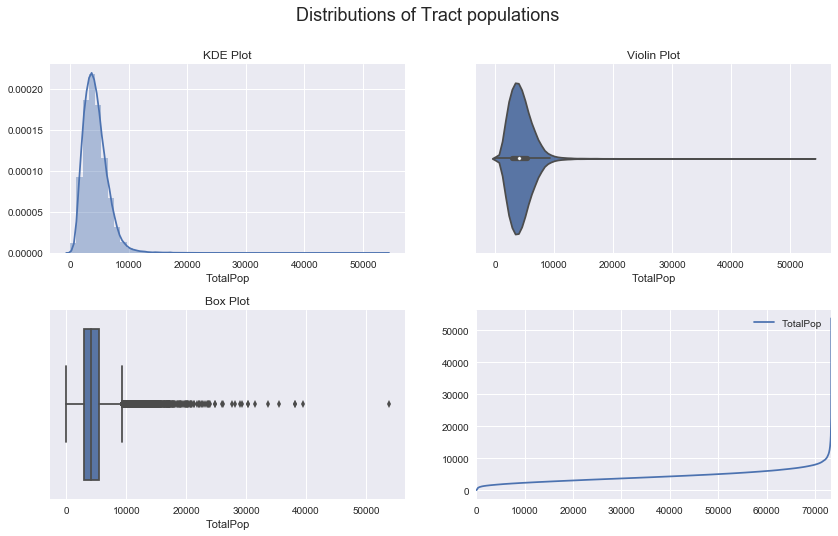

In [14]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of Tract populations", fontsize=18)

sns.distplot(tract.TotalPop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(tract.TotalPop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(tract.TotalPop, ax=axarr[1][0]).set(title="Box Plot")
_ = tract.TotalPop.sort_values().reset_index().drop("index", axis=1).plot(kind="line", ax=axarr[1][1])

### County distributions

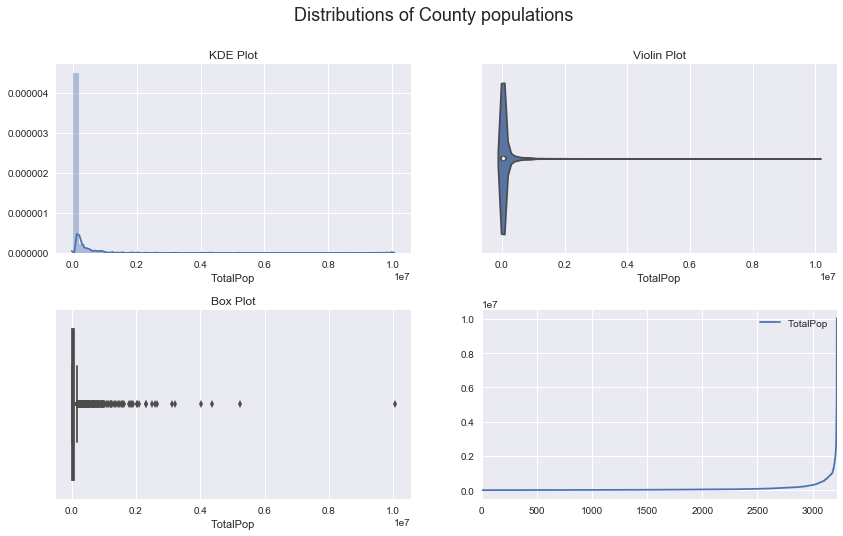

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of County populations", fontsize=18)

sns.distplot(county.TotalPop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(county.TotalPop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(county.TotalPop, ax=axarr[1][0]).set(title="Box Plot")
_ = county.TotalPop.sort_values().reset_index().drop("index", axis=1).plot(kind="line", ax=axarr[1][1])

### State Distributions

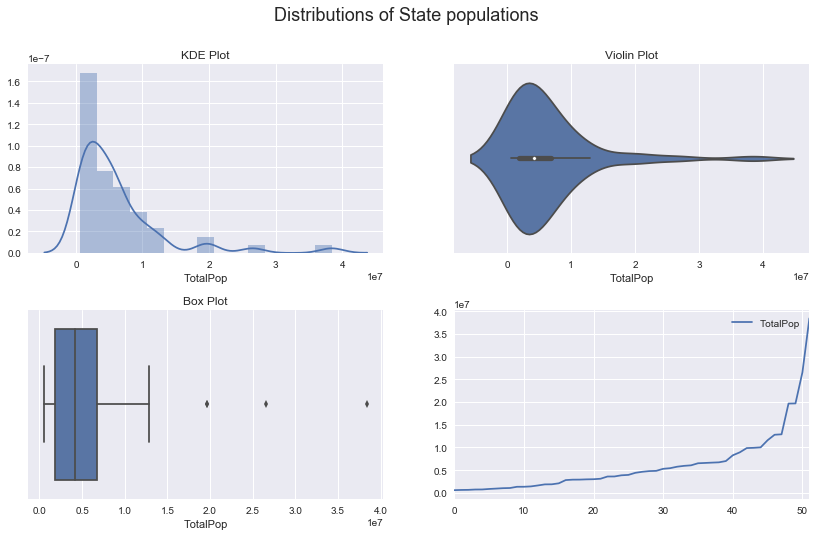

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle("Distributions of State populations", fontsize=18)

state_pop = county.groupby("State").TotalPop.sum()

sns.distplot(state_pop, ax=axarr[0][0]).set(title="KDE Plot")
sns.violinplot(state_pop, ax=axarr[0][1]).set(title="Violin Plot")
sns.boxplot(state_pop, ax=axarr[1][0]).set(title="Box Plot")
_ = state_pop.sort_values().reset_index().drop("State", axis=1).plot(kind="line", ax=axarr[1][1])

# Correlation Maps

Thank you to [Shashank Srivastava](https://stackoverflow.com/users/1688792/shashank-srivastava) for [his code](https://stackoverflow.com/questions/39191653/python-bokeh-how-to-make-a-correlation-plot)

In [17]:
def corr_map(df):
    df.index.name = 'AllColumns1'
    df.columns.name = 'AllColumns2'
    
    # Prepare data.frame in the right format
    df = df.stack().rename("value").reset_index()
    
    # You can use your own palette here
    colors = ['#d7191c', '#fdae61', '#ffffbf', '#a6d96a', '#1a9641']


    # I am using 'Viridis256' to map colors with value, change it with 'colors' if you need some specific colors
    mapper = LinearColorMapper(
        palette=Viridis256, low=df.value.min(), high=df.value.max())

    # Define a figure
    p = figure(
        plot_width=1100,
        plot_height=1000,
        x_range=list(df.AllColumns1.drop_duplicates()),
        y_range=list(df.AllColumns2.drop_duplicates()))

    # Create rectangle for heatmap
    p.rect(
        x="AllColumns1",
        y="AllColumns2",
        width=1,
        height=1,
        source=ColumnDataSource(df),
        line_color="Black",
        fill_color=transform('value', mapper))

    # Add legend
    color_bar = ColorBar(
        color_mapper=mapper,
        location=(0, 0),
        ticker=BasicTicker(desired_num_ticks=10))

    p.add_layout(color_bar, 'right')

    show(p)

In [22]:
df_1 = county.drop("CensusId", axis=1).corr().head(12)
corr_map(df_1)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='e42cdb15-e8c6-4530-846a-1d97a8ec8d06', ...)


In [23]:
df_2 = county.drop("CensusId", axis=1).corr().iloc[12:21]
corr_map(df_2)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='ac017984-e203-40ba-b99c-e91134149bd9', ...)


In [24]:
df_3 = county.drop("CensusId", axis=1).corr().tail(13)
corr_map(df_3)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='62dabf7f-eca9-4a0f-8e0a-48f905ed7715', ...)


<a name="state"></a>
# State